# Examen final de Desarrollo de Aplicaciones para la Visualización de Datos

Nombre: Silvia

Apellidos: García Lage

Tiempo: 2 horas y 30 minutos

## Contexto del ejercicio

El Ayuntamiento de Madrid desea entender en más detalle la situación del problema habitacional en la ciudad de Madrid basada en múltiples fuentes de datos como alquiler vacacional, evolución del precio de alquiler, inflacción y densidad poblacional.

El objetivo del análisis es buscar patrones para entender mejor que está sucediendo, que barrios son los más estresados y que factores son que hacen que el precio de la vivienda esté en máximos. Por lo tanto, se pide:

1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes. (3 Puntos)
2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)
3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)
4. Concluir todo este análisis haciendo un informe con 2 páginas como mínimo que incluya, preguntas que se van a responder, dashboard resumen que sustente las preguntas y recomendaciones para mejorar la situación habitacional a partir de los resultados obtenidos de los análisis realizados con los datos. (3 Puntos)

## Juego de datos

Para realizar este análisis se provee un juego de datos con las siguientes variables:


| **Variable**           | **Descripción**                                                                                     | **Tipo**                 |
|-------------------------|-----------------------------------------------------------------------------------------------------|--------------------------|
| `neighbourhood_group`   | Grupo de vecindarios o distritos en Madrid.                                                        | Categórica               |
| `date`                 | Fecha de la observación en formato `YYYY-MM-DD`.                                                   | Temporal                 |
| `m2_price`             | Precio promedio por metro cuadrado en euros.                                                       | Cuantitativa continua     |
| `inflation`            | Inflación mensual como porcentaje (incremento en los precios al consumidor).                       | Cuantitativa continua     |
| `HICP`                 | Índice armonizado de precios al consumidor (indicador de inflación en la zona euro).               | Cuantitativa continua     |
| `population_density`   | Densidad de población anual por km² para toda la Comunidad de Madrid.                                                  | Cuantitativa continua     |
| `listings_count`       | Número total de propiedades listadas en Airbnb en un vecindario.                                   | Cuantitativa discreta     |
| `minimum_nights`       | Número mínimo de noches requerido para alquilar una propiedad.                                     | Cuantitativa discreta     |
| `nigth_price`          | Precio promedio por noche de las propiedades en Airbnb.                                            | Cuantitativa continua     |
| `availability_365`     | Número de días al año que una propiedad está disponible para alquilarse.                           | Cuantitativa discreta     |
| `listing_reviews`      | Número promedio de reseñas por propiedad listada.                                                 | Cuantitativa continua     |
| `number_of_reviews`    | Total acumulado de reseñas para todas las propiedades en un vecindario.                            | Cuantitativa discreta     |
| `reviews_per_month`    | Número promedio de reseñas recibidas por una propiedad al mes.                                     | Cuantitativa continua     |
| `hosts_count`          | Número de anfitriones activos en un vecindario.                                                   | Cuantitativa discreta     |
| `Private_room`         | Número de propiedades que ofrecen habitaciones privadas.                                           | Cuantitativa discreta     |
| `Entire_home`          | Número de propiedades que ofrecen viviendas completas.                                             | Cuantitativa discreta     |
| `Hotel_room`           | Número de propiedades categorizadas como habitaciones de hotel.                                    | Cuantitativa discreta     |
| `Shared_room`          | Número de propiedades que ofrecen habitaciones compartidas.                                        | Cuantitativa discreta     |


Ejemplos de preguntas que se pueden realizar a los datos:
1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?
2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?
3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?
4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?
5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?
6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

Nota:
- Puedes hacer group_by para sacar variables agregadas por fecha.
- Se valorará la creatividad en las hipótesis, soluciones y limpieza del código y visualizaciones.

## Entrega del exámen

Compartir Url de github con:
- notebook que responde a las preguntas 1, 2 y 3
- PDF respondiendo a la pregunta 4

Puedes entregar el exámen en el siguiente enlace:

https://forms.gle/xe3En2raC3C3UUY39


# Librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.datasets

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression

import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Análisis descriptivos


In [2]:
df = pd.read_csv("housing_time_series_by_madrid_neighbourhood.csv", encoding='ISO-8859-1')
df.head()

,neighbourhood_group,date,m2_price,inflation,HICP,population_density,listings_count,minimum_nights,nigth_price,availability_365,listing_reviews,number_of_reviews,reviews_per_month,hosts_count,Private_room,Entire_home,Hotel_room,Shared_room
0,Centro,2010-08-01,15.3,0.3,1.6,796,1,2.0,114.000000,305.00,1,155.0,0.9000,1,0,1,0,0
1,Centro,2011-01-01,15.6,-0.7,3.0,800,1,2.0,114.000000,305.00,1,155.0,0.9000,1,0,1,0,0
2,Centro,2011-02-01,15.4,0.1,3.4,800,4,7.0,184.000000,44.25,4,100.0,0.5925,3,0,4,0,0
3,Centro,2011-05-01,15.0,0.0,3.4,800,5,9.6,61.000000,134.60,11,264.4,1.6120,4,1,4,0,0
4,Centro,2011-06-01,15.0,-0.1,3.0,800,5,5.4,135.333333,129.20,15,289.8,1.7680,4,1,4,0,0


#### Visualización 1: Evolución del precio promedio por metro cuadrado por grupo de vecindarios

Esta gráfica mostrará cómo cambian los precios (m2_price) en el tiempo para cada grupo de vecindarios.

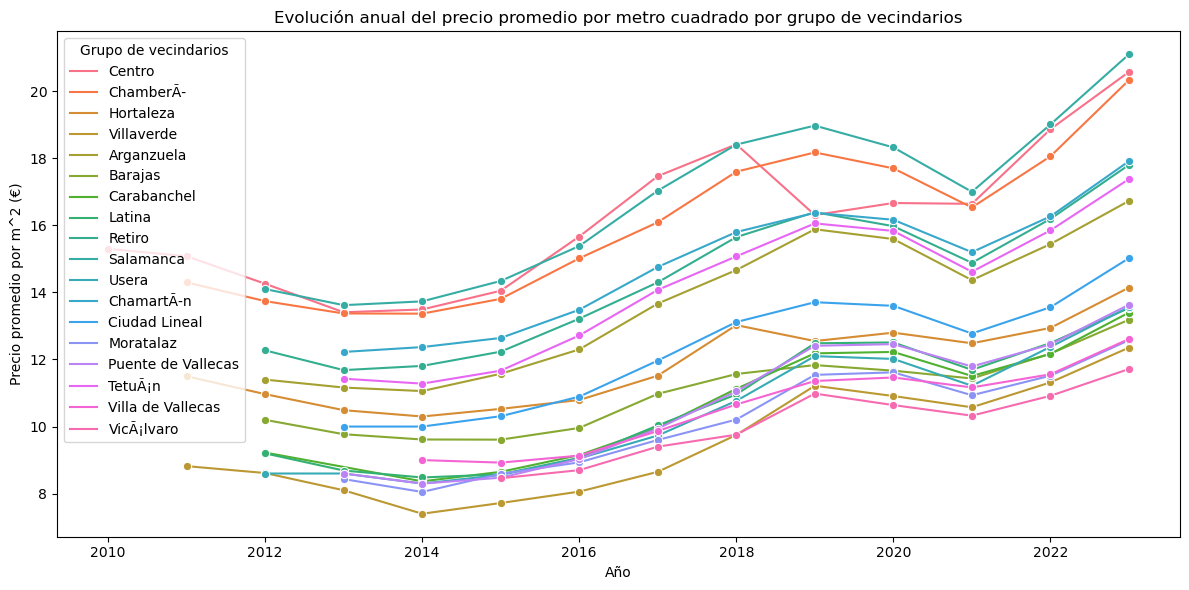

In [3]:
# Convertir la columna date a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Crear una nueva columna para el año
df['year'] = df['date'].dt.year

# Agrupar por año y grupo de vecindarios, calculando el precio promedio por metro cuadrado
yearly_data = df.groupby(['year', 'neighbourhood_group'])['m2_price'].mean().reset_index()

# Visualización de la evolución del precio por metro cuadrado agrupada por años
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_data, x='year', y='m2_price', hue='neighbourhood_group', marker='o')
plt.title("Evolución anual del precio promedio por metro cuadrado por grupo de vecindarios")
plt.xlabel("Año")
plt.ylabel("Precio promedio por m^2 (€)")
plt.legend(title="Grupo de vecindarios")
plt.tight_layout()
plt.show()

#### Visualización 2: ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?

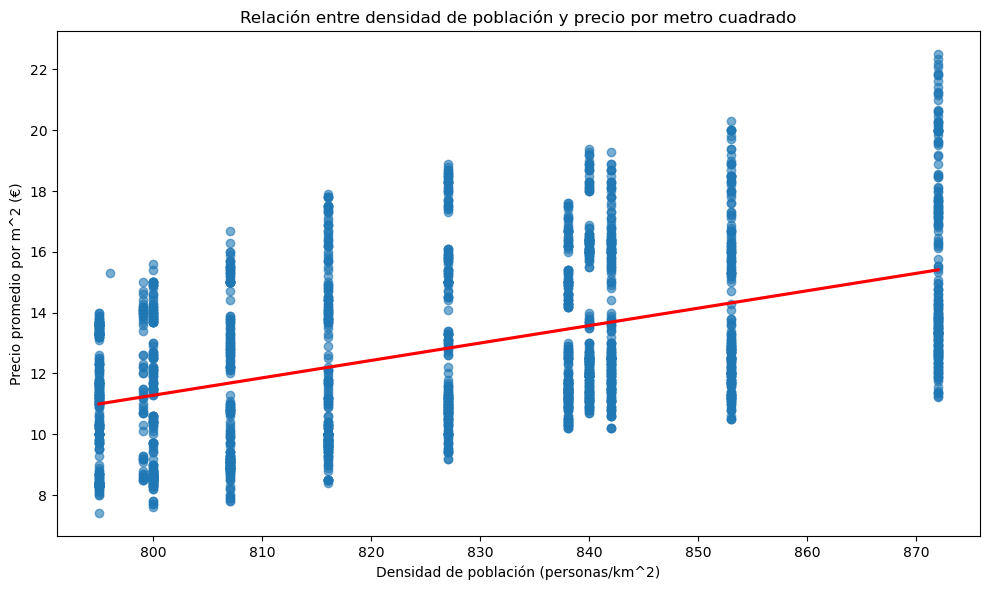

In [4]:
# Configuración del gráfico de dispersión con línea de tendencia
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df, 
    x='population_density', 
    y='m2_price', 
    scatter_kws={'alpha': 0.6},  
    line_kws={'color': 'red'},  
    ci=None  
)

plt.title("Relación entre densidad de población y precio por metro cuadrado")
plt.xlabel("Densidad de población (personas/km^2)")
plt.ylabel("Precio promedio por m^2 (€)")
plt.tight_layout()
plt.show()

#### Visualización 3: ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?

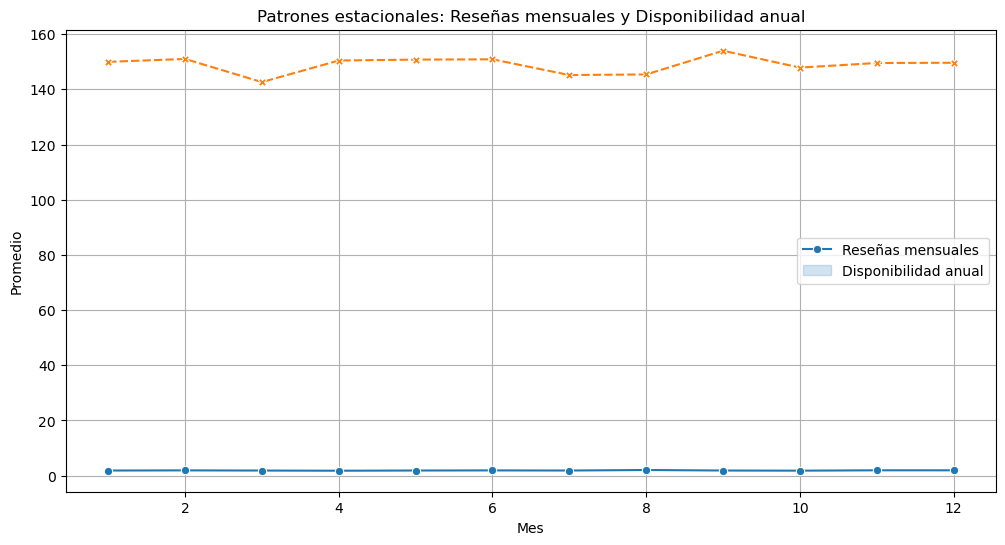

       reviews_per_month  availability_365
month                                     
1               1.858523        149.971388
2               1.916475        151.017309
3               1.855726        142.631535
4               1.792505        150.455302
5               1.867928        150.784080
6               1.908917        150.890243
7               1.863625        145.190803
8               2.050415        145.411451
9               1.864858        154.002765
10              1.813551        147.889522
11              1.946439        149.554065
12              1.938247        149.634113


In [29]:
# Agrupamos la columna de las fechas por mes
df['month'] = pd.to_datetime(df['date']).dt.month

# creamos una variable de los datos por 'reviews_per_month' y disponibilidad al año
seasonal_data = df.groupby('month')[['reviews_per_month', 'availability_365']].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_data, markers=True)
plt.title("Patrones estacionales: Reseñas mensuales y Disponibilidad anual")
plt.xlabel("Mes")
plt.ylabel("Promedio")
plt.legend(["Reseñas mensuales", "Disponibilidad anual"])
plt.grid()
plt.show()
print(seasonal_data)

#### Visualización 4: ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?

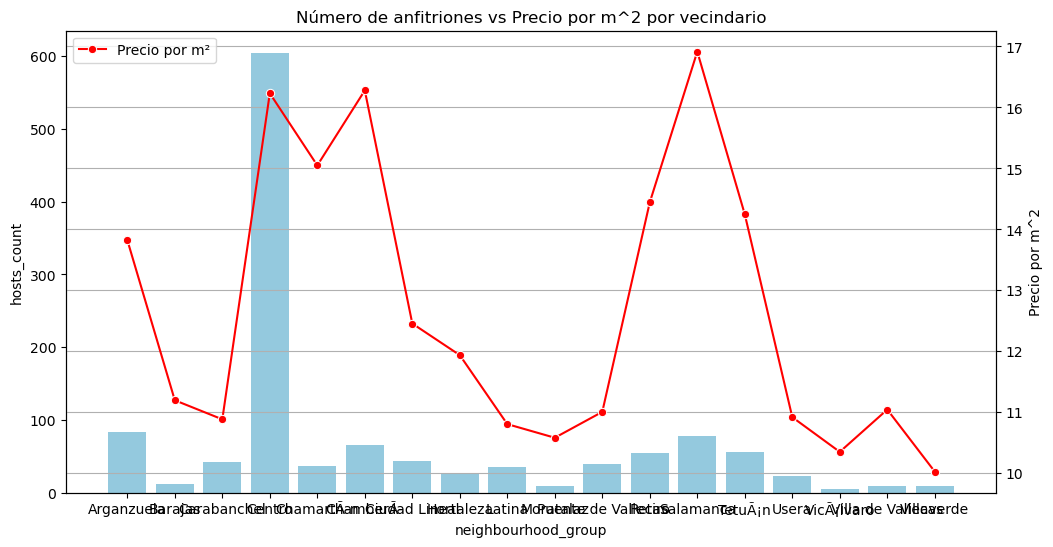

In [33]:
# agrupamos los datos por vecindario y sacamos la media de los anfitriones y el precio de la vivienda
neighbourhood_hosts = df.groupby('neighbourhood_group')[['hosts_count', 'm2_price']].mean()

plt.figure(figsize=(12, 6))
sns.barplot(data=neighbourhood_hosts.reset_index(), x='neighbourhood_group', y='hosts_count', color='skyblue', label='Anfitriones')
plt.twinx()  
sns.lineplot(data=neighbourhood_hosts, x=neighbourhood_hosts.index, y='m2_price', marker='o', color='red', label='Precio por m²')

plt.title("Número de anfitriones vs Precio por m^2 por vecindario")
plt.ylabel("Precio por m^2")
plt.legend(loc="upper left")
plt.grid()
plt.show()

#### Visualización 5: ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?

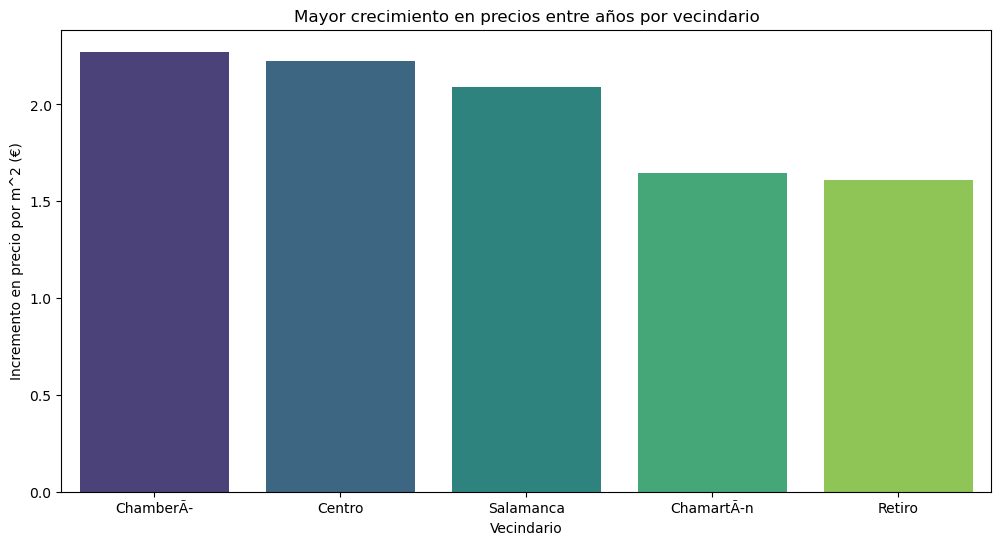

In [16]:
df['year'] = pd.to_datetime(df['date']).dt.year
price_growth = df.groupby(['neighbourhood_group', 'year'])['m2_price'].mean().reset_index()

# Calculamos crecimiento del precio
price_growth['price_change'] = price_growth.groupby('neighbourhood_group')['m2_price'].diff()

# Filtramos los 5 primeros
top_growth = price_growth.groupby('neighbourhood_group')['price_change'].max().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_growth.index, y=top_growth.values, palette='viridis')
plt.title("Mayor crecimiento en precios entre años por vecindario")
plt.ylabel("Incremento en precio por m^2 (€)")
plt.xlabel("Vecindario")
plt.show()

#### Visualización 6: ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

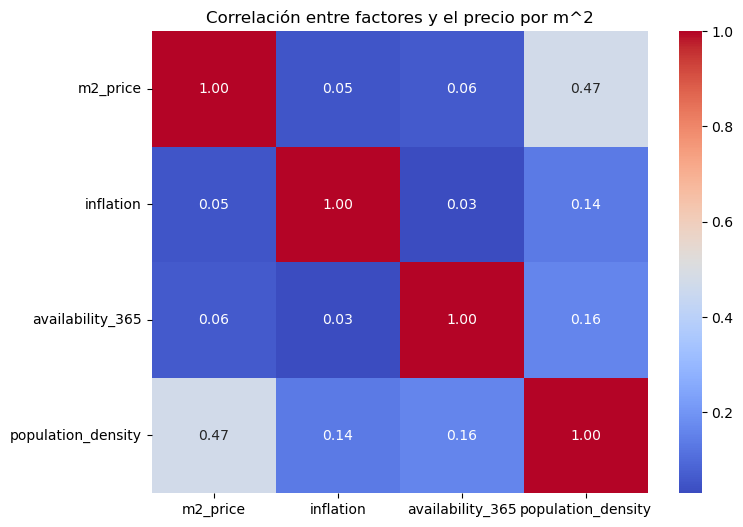

In [20]:
# aquí vamos a hacer un gráfico de correlación
# lo primero los factores de correlación
correlation_factors = df[['m2_price', 'inflation', 'availability_365', 'population_density']]

# lo segundo la matriz de correlación
correlation_matrix = correlation_factors.corr()

# Y ahora vamos a el gráfico de cuadrados y correlación entre variables
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre factores y el precio por m^2")
plt.show()

## Modelo de regresión lineal

In [25]:
# Filtrar los datos para que solo incluyan el período deseado
df = df[(df['date'] >= '2010-01-01') & (df['date'] <= '2023-12-31')]

# Seleccionar las variables relevantes (agregadas, no por barrio)
aggregated_data = df.groupby('date').agg({
    'reviews_per_month': 'mean',
    'availability_365': 'mean',
    'inflation': 'mean',
    'population_density': 'mean',
    'm2_price': 'mean'
}).reset_index()

In [26]:
# Variables independientes (factores explicativos)
X = aggregated_data[['reviews_per_month', 'availability_365', 'inflation', 'population_density']]

# Variable dependiente (target)
y = aggregated_data['m2_price']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Mostrar los resultados
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.2288734376529348


In [28]:
# Mostrar los coeficientes del modelo
print('Coeficientes del modelo:')
print(f'Coeficientes: {model.coef_}')
print(f'Intercepto: {model.intercept_}')

# Mostrar R^2
r2 = model.score(X_test, y_test)
print(f'R^2: {r2}')

Coeficientes del modelo:
Coeficientes: [-0.74218975  0.00492026 -0.08039     0.05983963]
Intercepto: -35.827005848456466
R^2: 0.8538654832928576


### Dashboard con 4 visualizaciones

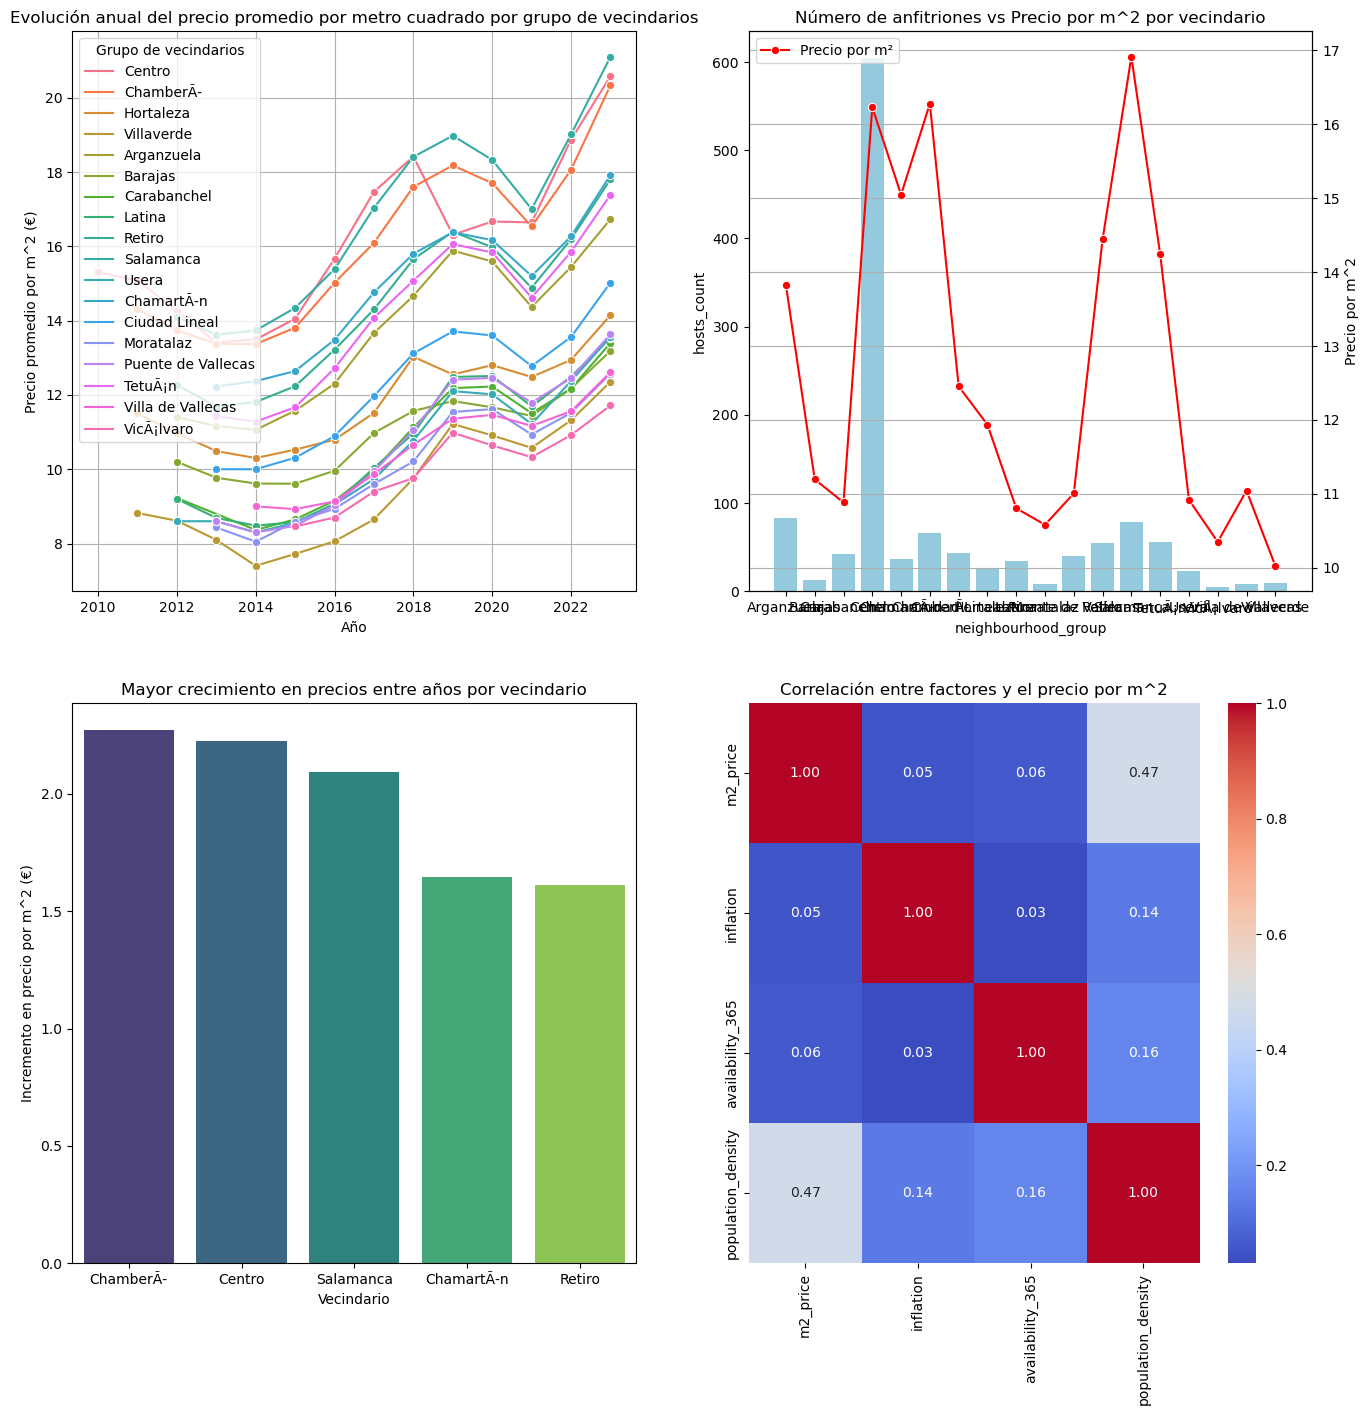

In [24]:
plt.figure(figsize = (16,16))

# Primera figura (arriba izquierda)
plt.subplot(2,2,1) # Numero de filas, Numero de columnas, Numero de figura

sns.lineplot(data=yearly_data, x='year', y='m2_price', hue='neighbourhood_group', marker='o')
plt.title("Evolución anual del precio promedio por metro cuadrado por grupo de vecindarios")
plt.xlabel("Año")
plt.ylabel("Precio promedio por m^2 (€)")
plt.legend(title="Grupo de vecindarios")

plt.grid(True)

#Segunda figura (arriba derecha)
plt.subplot(2,2,2)

sns.barplot(data=neighbourhood_hosts.reset_index(), x='neighbourhood_group', y='hosts_count', color='skyblue', label='Anfitriones')
plt.twinx()  
sns.lineplot(data=neighbourhood_hosts, x=neighbourhood_hosts.index, y='m2_price', marker='o', color='red', label='Precio por m²')

plt.title("Número de anfitriones vs Precio por m^2 por vecindario")
plt.ylabel("Precio por m^2")
plt.legend(loc="upper left")
plt.grid()

#Tercera figura (abajo izquierda)
plt.subplot(2,2,3)

sns.barplot(x=top_growth.index, y=top_growth.values, palette='viridis')
plt.title("Mayor crecimiento en precios entre años por vecindario")
plt.ylabel("Incremento en precio por m^2 (€)")
plt.xlabel("Vecindario")

# Cuarta figura (abajo derecha)
plt.subplot(2,2,4)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre factores y el precio por m^2")
plt.show()